# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:33:09.589101: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:33:12.551278
2025-04-15 00:33:12.551278


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 5
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:33:07"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

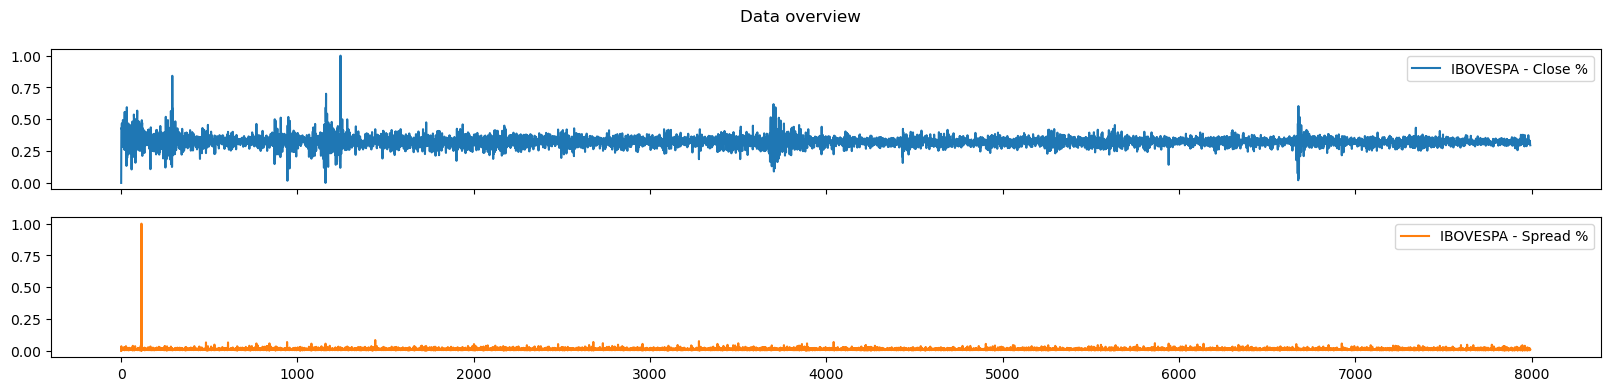

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

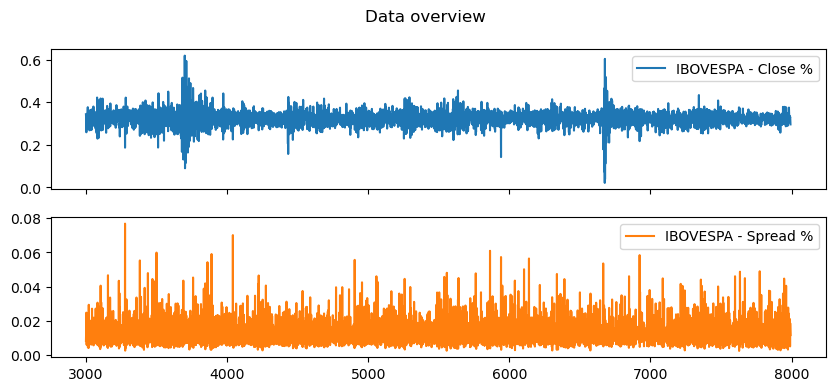

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

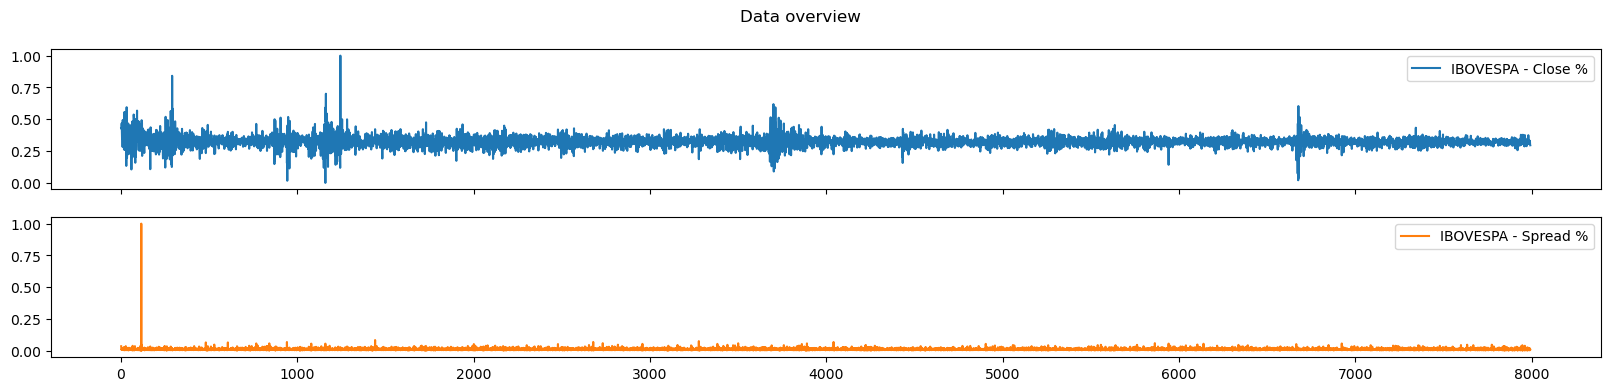

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

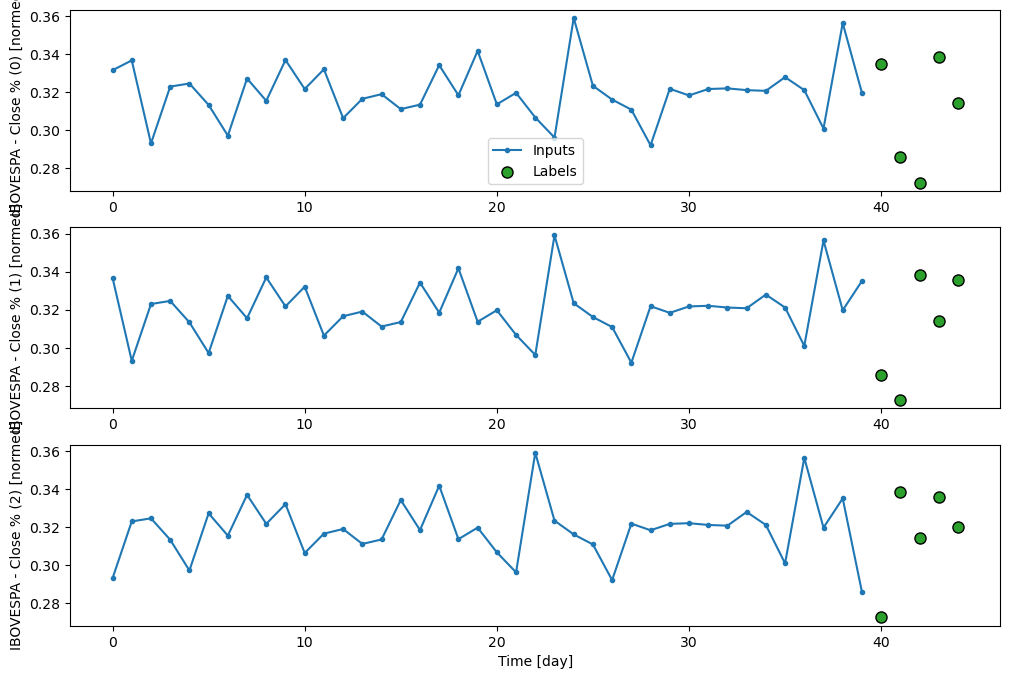

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12:15 3s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 87.9835 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3301  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3895 - mean_absolute_error: 0.3895 - mean_absolute_percentage_error: 117.0556 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.4810

  8/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3858 - mean_absolute_error: 0.3858 - mean_absolute_percentage_error: 116.7179 - mean_squared_error: 0.2626 - root_mean_squared_error: 0.4942

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3747 - mean_absolute_error: 0.3747 - mean_absolute_percentage_error: 113.6079 - mean_squared_error: 0.2566 - root_mean_squared_error: 0.4918

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 109.2022 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4831

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 104.9428 - mean_squared_error: 0.2347 - root_mean_squared_error: 0.4723

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3309 - mean_absolute_error: 0.3309 - mean_absolute_percentage_error: 100.7290 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4610

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 96.7637 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4497 

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3052 - mean_absolute_error: 0.3052 - mean_absolute_percentage_error: 93.0408 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4388

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 89.5739 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4284

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 86.3590 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4186

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 83.3971 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.4094

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 80.6880 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.4007

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 78.3808 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3926

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 76.2205 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3850

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 74.2091 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3778

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 14945.4521 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3710

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 21483.4570 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3678

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 33042.6094 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3616

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 42879.1523 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3558

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 51286.8594 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3503

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 58500.3828 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3450

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 64708.9961 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3399

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 72466.8281 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3328

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 76777.9062 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3283

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 80514.0938 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3239

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 83754.7422 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3198

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 86566.4766 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3158

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 89005.5469 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3120

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 91119.6719 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3083

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 92949.5469 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.3048

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1757 - mean_absolute_error: 0.1757 - mean_absolute_percentage_error: 93768.9844 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.3030

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 94530.0234 - mean_squared_error: 0.1033 - root_mean_squared_error: 0.3014

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 95891.0781 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.2981

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1692 - mean_absolute_error: 0.1692 - mean_absolute_percentage_error: 97058.5781 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.2949

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 98054.9531 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2918

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1644 - mean_absolute_error: 0.1644 - mean_absolute_percentage_error: 98899.7188 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2888

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 99270.6406 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2874

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 99919.1953 - mean_squared_error: 0.0934 - root_mean_squared_error: 0.2846

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 100454.7734 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2818

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1569 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 100889.6328 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2792

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 101234.5625 - mean_squared_error: 0.0888 - root_mean_squared_error: 0.2766

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 101376.3281 - mean_squared_error: 0.0881 - root_mean_squared_error: 0.2753

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 101603.9062 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2729

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 101763.3906 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2705

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 101861.8516 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2681

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 101905.5703 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2659

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1451 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 101900.1562 - mean_squared_error: 0.0817 - root_mean_squared_error: 0.2637

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 101850.6250 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2615

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 101761.4453 - mean_squared_error: 0.0794 - root_mean_squared_error: 0.2594

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - mean_absolute_percentage_error: 101636.6562 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2574

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 101562.0391 - mean_squared_error: 0.0778 - root_mean_squared_error: 0.2564

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - mean_absolute_percentage_error: 101479.8438 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2554

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 101294.2734 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2535

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 101082.8672 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2516

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 100848.2422 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2497

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 100592.8047 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2479

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 100457.9453 - mean_squared_error: 0.0728 - root_mean_squared_error: 0.2470

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 100175.2266 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2453

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 99876.6875 - mean_squared_error: 0.0711 - root_mean_squared_error: 0.2436 

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 99563.9922 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2420

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 99238.6719 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2403

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 99071.7188 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2395

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 98730.0000 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2380

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 98378.8828 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2365

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 98019.4375 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2350

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 97652.6641 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2335

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 97279.4688 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2320

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 96900.6719 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2306

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 96517.0156 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2293

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 96129.1953 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2279

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 95933.9141 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2272

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 95737.8281 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2266

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 95343.4844 - mean_squared_error: 0.0619 - root_mean_squared_error: 0.2253

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 94946.6953 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2240

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 94547.9219 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2227

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 94147.6016 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2215

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 93946.9844 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2209

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 93746.1328 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2203

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 93343.8750 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2191

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 92941.1641 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2179

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 92538.2969 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2167

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 92135.5469 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2156

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 91733.1797 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2145

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 91130.8125 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2129

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 90730.3281 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2118

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 90131.7031 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2102

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 89536.0625 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2087

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 89140.8750 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2077

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 88551.2500 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2062

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 88160.4375 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2053

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 87771.5469 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2043

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 87192.0078 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2029

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 86808.2969 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2020

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 86426.7734 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2011

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 86047.5078 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2002

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 85670.5469 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.1993

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 85295.9375 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.1985

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 85109.5234 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.1980

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 84923.7188 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.1976

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 84553.9297 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.1968

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 84186.6016 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.1959

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 83821.7578 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.1951

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 83279.1953 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1939

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 82742.3438 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.1927

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 82387.6328 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.1920

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 82035.4922 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1912

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 81685.9219 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.1905

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 81338.9219 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1897

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 80823.2578 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1886

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 80482.7031 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.1879

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 79976.6953 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.1868

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 79642.5547 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1861

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 79310.9766 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1854

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 78818.3906 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1844

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 78493.1719 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1838

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 78170.4688 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1831

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 77850.2812 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1824

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 77375.2578 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1815

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 77219.2500 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1812 - val_loss: 0.0168 - val_mean_absolute_error: 0.0168 - val_mean_absolute_percentage_error: 5.0946 - val_mean_squared_error: 4.2529e-04 - val_root_mean_squared_error: 0.0206 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 28.1844 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1031

  3/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 26.4506 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1050

  4/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 25.4636 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1024

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 23.8436 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0969 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 23.8274 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 23.6626 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0940

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 23.1966 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.6598 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0904

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.3816 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.0931 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 21.8102 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0876

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 21.5372 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 20.9892 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0849

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.4608 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0832

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 19.9718 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.5522 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.3608 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.2695 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0792

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0931 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.9172 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 8656.9785 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 23863.8379 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0760

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 36738.2969 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 47694.2773 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0754

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 57058.9531 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 61228.3398 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 68679.7734 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 75102.0938 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 80650.4688 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 85452.6406 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 89614.5234 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 93224.5000 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 96356.7656 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 99073.9766 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 101429.2656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 103467.9609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 104380.9375 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 105228.8828 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 106745.3984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0708

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 108046.3438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 109156.6875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 110098.1484 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 110511.5625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 110889.6719 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 111234.4844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0694

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 111831.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 112316.4531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 112701.1719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 112996.3516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 113211.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 113354.6172 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 113433.4688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 113454.5547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 113423.7812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 113346.4141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 113227.1953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 113070.3516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 112979.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 112879.7031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 112658.6797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 112410.3672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 112137.5625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111842.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111528.2969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111196.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110848.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110486.3516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110300.5781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110111.8594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109920.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109726.2344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109529.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109330.7422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109129.6641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0634

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108926.5469 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108721.5156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108514.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108306.2031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108096.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107884.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107671.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107457.6641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107026.0469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106590.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106151.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105709.9453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105266.1016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104820.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104597.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104373.6797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103925.9453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103477.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103029.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102580.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102133.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101462.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101016.7891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100572.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100129.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99687.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599 

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99028.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98591.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98156.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97723.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97292.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96864.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96438.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96014.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95593.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95384.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94967.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94552.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94141.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93732.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93326.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92922.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92522.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92124.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91729.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91337.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90948.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90562.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90178.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89988.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89608.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89420.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89232.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88859.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88488.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88121.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87938.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87756.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87394.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87034.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86678.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86324.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85975.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 4.4809 - val_mean_squared_error: 3.3526e-04 - val_root_mean_squared_error: 0.0183 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 28.2636 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1020

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 26.1723 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1021 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.3071 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0963

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 23.4141 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 23.6941 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 23.4781 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0916

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 23.0229 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 22.4980 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.9428 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.3950 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.8552 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5893 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.0890 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0807

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.6337 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.2472 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0781

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 19.0744 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.8955 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.7331 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0754

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 16717.4043 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 30814.3125 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 42780.9297 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 52987.7500 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 61729.1953 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 69241.6172 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 75716.5000 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 81310.2891 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 88324.4844 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 92232.0391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 95622.1875 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 98563.6094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 101114.4453 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 103324.1484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 105234.9844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 106089.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 106883.2109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 108300.1016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 109512.6797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 110544.4219 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 111415.7812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 112144.6172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 112746.5859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 113235.4453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 113623.3203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 113920.9141 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 114218.4688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 114329.5391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 114379.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 114373.5469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 114318.4062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 114218.7500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 114079.0781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 113903.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 113695.5312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 113458.5703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 113195.5469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 112909.1328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 112601.7344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 112275.5391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111932.5391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111574.5156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111203.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110819.7656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110225.3281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109817.8203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109402.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108980.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108552.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108119.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107682.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107241.7734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106797.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106351.4141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105903.0078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105453.0938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105002.0938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104550.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104098.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103646.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103194.4844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102743.2422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102067.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101619.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100948.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100281.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99838.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99397.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98959.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98522.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97872.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97441.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97013.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96587.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96164.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95744.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95326.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94911.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94499.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94089.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93683.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93279.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92878.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92480.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92084.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91692.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91303.1641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90916.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90532.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90152.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89774.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89399.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89027.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88657.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88291.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87927.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87387.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87030.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86679.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552 - val_loss: 0.0141 - val_mean_absolute_error: 0.0141 - val_mean_absolute_percentage_error: 4.2925 - val_mean_squared_error: 3.0766e-04 - val_root_mean_squared_error: 0.0175 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 28.3165 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1016

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.1351 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0992 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 23.4592 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0936

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 23.3505 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0922

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0866 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.6061 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.0700 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.5101 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0859

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 20.6968 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0834

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 20.1666 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.6727 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.2251 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0787

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 18.8504 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.6920 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.5277 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3766 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 23939.5234 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 42568.8828 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 52725.1758 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0735

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 61423.3477 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 68898.5781 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 78225.4766 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 83402.7422 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 87886.9922 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 93521.7109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 96663.9844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 99389.8750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 102812.4297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 104713.8047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 106353.8828 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 107763.7578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 108970.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 109996.9844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 110864.0312 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 111589.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 112188.2578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 112674.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 113219.3359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 113474.1484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 113716.2031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 113795.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 113816.4766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 113785.6094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 113708.0000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 113514.2031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 113339.4531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 113018.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 112635.0547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 112350.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 112044.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111550.9375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 111201.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110838.8438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110463.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109879.1016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109477.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109068.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108651.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108441.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108015.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107584.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107149.5000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106710.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106269.0625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105601.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104930.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104482.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104032.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103582.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103133.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102683.5625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102234.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101786.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101339.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100893.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100448.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100005.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99564.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589 

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99124.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98687.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98251.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97818.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97173.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96745.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96321.1016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95898.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95479.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94854.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94441.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94031.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93623.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93219.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92817.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92418.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91825.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91433.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91044.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90658.4297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90275.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89894.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89517.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89142.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88771.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88402.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88036.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87672.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87312.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86954.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86424.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86250.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 4.1141 - val_mean_squared_error: 2.8220e-04 - val_root_mean_squared_error: 0.0168 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 28.3654 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1011

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 26.0574 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 24.1882 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0945

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 23.2765 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0906

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.5264 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 23.0773 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.5804 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 22.0334 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4729 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.9368 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.4038 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.9052 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.4517 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 19.0730 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.9133 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.6680 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 8548.8740 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 23565.8516 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 41904.0312 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 51901.5820 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 60463.8008 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 67822.1953 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 74164.3281 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 79643.4219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 84385.6328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 88495.5469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 92060.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 95153.6094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 99041.5469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 101205.9453 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 103077.5938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 104692.0312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 106079.8672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 107267.5938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 108278.1875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 109505.0703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 110155.0312 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 110687.6875 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 111115.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 111450.1484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 111700.9688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 111876.8984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 111985.6953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 112034.2734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 112028.8047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111974.7891 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111877.1719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111740.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111568.3438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111364.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111132.5781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110874.9453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110594.3984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110293.3047 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109973.7969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109637.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109287.1406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108736.9766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108356.1641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107965.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107566.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107159.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106537.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106115.9219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105689.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105259.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104826.1406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104390.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103951.7266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103511.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103070.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102628.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102185.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101742.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101300.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100857.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100416.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99975.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99316.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98878.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98442.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98008.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97575.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97145.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96716.4453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96077.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95654.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95234.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94815.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94400.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93987.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93576.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93168.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92763.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92160.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91762.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91366.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90974.2344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90584.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90004.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89621.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89241.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88864.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88676.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88303.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87933.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87566.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87201.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86840.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86481.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86125.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85771.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85421.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85073.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84902.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8196 - val_mean_squared_error: 2.4182e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4656 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 26.0135 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0992 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 24.1047 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0934

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 23.1476 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

  9/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.3643 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.2903 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 12/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.9001 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 22.6566 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0877

 14/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.4013 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 16/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.8559 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853 

 18/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.2959 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.7638 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.2360 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0804

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.7436 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.2969 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.9254 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.7783 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 32/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6219 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.5489 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 8249.2773 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 22739.0391 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 35006.3867 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 45445.7266 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 54368.7969 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 62024.6055 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 68614.0000 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 74300.3984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 79217.8203 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 83477.0000 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 87170.0703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 90374.1250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 93154.0859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95564.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97653.3125 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 98589.3281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99459.2500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 100267.2031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101017.0078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101712.2109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102356.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102951.8047 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103502.1406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 104009.7891 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104477.2500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104906.8594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105300.7812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 76/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105661.0625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105989.6094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 78/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106288.2031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106558.5312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 80/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106802.1562 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 81/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107020.5547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 82/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107215.1172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107387.1406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 84/237 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107537.8438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 85/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107668.3906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 86/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107779.8672 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 87/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107873.2812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 88/237 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107949.6172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108009.7656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 90/237 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108054.5859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 91/237 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108084.8984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 92/237 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108101.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 93/237 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108104.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 94/237 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108096.1797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 95/237 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108075.6641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 96/237 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108044.0625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 98/237 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 107949.8750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 99/237 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107888.3438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

100/237 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107817.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

101/237 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107738.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

102/237 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107651.8828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

103/237 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107557.2422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

104/237 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107455.3672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107346.6406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

106/237 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107231.4141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

107/237 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107110.0391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

108/237 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 106982.8281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

109/237 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106850.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

110/237 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106712.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106569.2109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

112/237 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106421.6016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106269.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630 

114/237 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106113.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

116/237 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105789.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

118/237 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105450.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

120/237 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105099.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104737.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

124/237 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104365.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

126/237 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103984.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

128/237 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103595.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

130/237 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103199.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

132/237 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102797.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

134/237 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102390.8750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

136/237 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101979.6016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

138/237 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101564.5703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

139/237 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101355.8281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

141/237 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100936.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100514.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

145/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100090.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

147/237 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99665.3281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602 

149/237 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99239.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

151/237 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98812.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

152/237 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98598.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

154/237 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98171.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

156/237 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97744.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97530.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

159/237 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97104.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

161/237 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96678.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

163/237 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96253.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

165/237 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95830.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95407.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 94987.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

171/237 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94567.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94150.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93734.8984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

177/237 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93321.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92909.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

180/237 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92705.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

182/237 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92296.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91891.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

186/237 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91487.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

188/237 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91086.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90687.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90291.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89898.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89702.3906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

197/237 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89312.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

198/237 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89118.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88925.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

201/237 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88541.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88159.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87780.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87404.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87030.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86660.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86292.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85926.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

218/237 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85383.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84847.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84492.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83966.0000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83618.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83273.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82931.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82591.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82254.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81921.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 3.9873 - val_mean_squared_error: 2.6428e-04 - val_root_mean_squared_error: 0.0163 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4110 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1007

  2/237 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 27.5125 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1024

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 25.0196 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0974

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 23.3546 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0919 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.0727 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0904

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.2078 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.1173 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

 12/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.7027 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 14/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.1922 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873 

 16/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.6410 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 18/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 21.0795 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 20.5480 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 20.0220 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.7716 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 24/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.5314 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.0860 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.7168 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765 

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.5739 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.4203 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 34/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.2763 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 15609.6650 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 28771.8125 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 39944.9297 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 49474.9375 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 57636.7383 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 64651.0156 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 73402.7656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 78260.7812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 82468.5078 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 86116.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 89282.3047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 92028.6797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 94410.3750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96473.5469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98257.6719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99796.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101119.5469 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102753.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103639.4688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104384.5547 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105004.1250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 105511.8672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 105919.8359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 106238.6719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 106477.7656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106704.8828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 106779.1172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 106798.9688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 106769.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 106697.1641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106584.9375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106437.2969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106257.8281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106049.7734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105690.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 105422.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105135.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 104831.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 104511.0859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104176.7969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 103830.0078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 103472.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103104.3047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102727.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102343.5781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 101952.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 101555.8047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101153.8828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100747.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100337.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99924.4141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607 

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 99508.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 99090.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 98671.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98040.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 97618.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97196.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 96774.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96352.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95931.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95510.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94881.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 94463.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93839.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 93425.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93013.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92397.9766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91990.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91585.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91181.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90780.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90382.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89986.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89592.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89200.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88618.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88233.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87851.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87471.7344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87094.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86534.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86163.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85796.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85431.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85068.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84709.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84352.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83998.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83646.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83297.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82951.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82608.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82267.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81929.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81593.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81095.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80932.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9100 - val_mean_squared_error: 2.5427e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4133 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 26.0023 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 24.0813 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0938

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 23.2442 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.1864 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 22.5413 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 22.0101 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.4511 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.9093 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.3795 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 19.8706 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.3989 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0781

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.8190 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.6798 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.5309 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.3911 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 15287.1104 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 33868.2539 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 43968.0391 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 52600.8711 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 60007.6602 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 66382.7266 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 74348.7266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 78775.6094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 82612.2422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85940.1016 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 90124.5938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 92456.9922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 94477.4688 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96224.6719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97731.7578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99027.3125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100136.0547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101079.4453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 101876.1875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102542.6016 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 103093.0234 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 103540.0156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 103894.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104274.6172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 104497.0391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 104569.7266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 104589.1641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 104560.7891 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 104489.4688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 104379.5625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 104234.9766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 104059.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 103855.4688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 103503.4844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 103241.5938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 102960.5156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 102662.2500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 102348.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 102021.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 101681.6328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 101331.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 100970.9453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 100602.2188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 100225.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 99649.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616 

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 99258.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 98862.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 98462.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 98059.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 97653.5703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 97245.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 96835.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 96423.9688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 96011.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 95598.5625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95185.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 94771.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94358.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 93946.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 93328.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 92918.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 92509.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92101.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 91694.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91088.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 90686.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90286.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89888.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89295.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 88902.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88512.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88124.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 87738.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87355.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 86974.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86596.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86220.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85847.4219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85292.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 84925.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84561.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84020.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83663.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83308.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82956.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82606.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82260.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 81915.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81574.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81235.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80898.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80565.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80069.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 79579.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 79257.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7883 - val_mean_squared_error: 2.3699e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4660 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 25.9744 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 24.0652 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.1051 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.3244 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.8651 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.3664 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.8198 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.2578 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.4625 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.9525 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.4800 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.0788 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.8251 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.6098 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8031.5742 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22138.0918 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 39364.4531 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 52931.2695 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 60384.5938 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 66799.7031 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 72335.7031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 77123.0625 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 83131.1797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 86479.9453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 90690.7266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93037.7734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95070.9453 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96829.1250 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98345.6797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99649.3672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100765.0781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102132.6328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 102866.8906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 103740.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 104379.8359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104694.0234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104929.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 105094.8984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 105197.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105242.7266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 105237.5859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 105186.8438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 105095.1406 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 104889.7422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 104712.8906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 104507.8516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 104277.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104024.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 103750.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103459.2500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 102991.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 102662.1094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 102320.3594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 101967.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 101605.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101234.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 100855.5391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 100470.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100079.2109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 99483.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613 

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99081.1250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 98675.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98266.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 97650.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97236.7969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 96822.2734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96199.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95783.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95367.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94951.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94536.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94121.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 93708.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93295.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 92884.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92475.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92066.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91660.5938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91256.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90853.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90452.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89856.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89460.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89068.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88677.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88289.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87903.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87520.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87140.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86762.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86386.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86013.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85459.3672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85093.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84729.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84188.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83831.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83477.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83125.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82776.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82430.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82086.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81745.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81407.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80904.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80572.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80242.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 79755.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8942 - val_mean_squared_error: 2.4935e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4975 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 26.0124 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 23.2910 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.1345 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.0354 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.6174 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.8301 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.2707 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.7302 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 19.9414 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.4530 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8204 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.5680 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.4281 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.2830 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8043.8828 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 22172.5234 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 34134.1406 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 44313.3086 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 53013.9961 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 60479.0078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 66904.1797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 72448.8672 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 77243.7344 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 81396.7734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 84997.8047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 88122.0078 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90832.6875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94238.3281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96132.4766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97768.5391 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99177.5391 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100386.2422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 101417.8594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102292.5703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103348.3359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 103903.0859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104353.5938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104711.0391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 104985.2891 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 105259.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 105361.8594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 105411.0078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 105382.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105310.5312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 105199.7656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105054.0391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 104876.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 104671.5547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104440.8438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104187.3828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 103913.5000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103621.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103312.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102822.9219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102480.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102127.3750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101764.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101204.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100627.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100235.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99839.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611 

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99438.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98830.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98420.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 98009.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97389.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96766.0391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96349.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95724.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95308.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94892.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94476.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94062.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93648.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93235.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92619.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92211.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91804.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91399.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90995.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90594.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90195.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89601.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89207.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88816.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88427.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88041.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87657.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87276.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86898.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86334.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85962.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85593.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85043.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84681.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84141.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83785.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83431.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83080.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82732.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82215.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81873.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81534.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81030.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80698.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 80368.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 79880.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8837 - val_mean_squared_error: 2.5044e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4368 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 25.9661 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0635 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.1126 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.3461 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 23.1199 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.6576 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 22.1324 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.5752 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.7678 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.9953 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.5231 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.1212 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.8647 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.7218 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.5756 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8142.3276 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 28745.3828 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 39908.1406 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 53662.4141 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 61218.7227 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 67722.4766 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 75849.2891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 82392.3047 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 86037.3750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 89199.7891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 91943.6172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95390.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97308.2188 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98964.2969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101026.0625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102157.1875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103119.6250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103932.4453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104612.3203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105414.3125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105821.9062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106140.4375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 106379.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 106606.2188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 106696.7266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 106691.5078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 106598.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 106416.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 106252.9922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 106059.0234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105837.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 105592.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 105325.4453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 105038.6875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104576.2734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104249.1094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103733.9922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103376.4062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103008.9609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102441.7656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102054.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101660.8047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101060.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100654.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100038.7422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99624.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609 

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99208.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98789.8984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98370.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97738.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97317.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96684.7422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96052.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95632.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95212.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94793.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94376.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93752.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93338.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92926.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92516.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91905.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91500.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91097.4922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90497.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90100.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89705.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89313.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88923.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88536.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88152.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87580.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87014.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86640.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86268.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85899.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85533.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85170.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84810.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84452.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84096.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83744.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83394.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82874.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82531.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82191.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81853.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81351.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80857.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8896 - val_mean_squared_error: 2.5102e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4305 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 25.9817 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 23.3999 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 23.3882 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.3853 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 23.0154 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.5242 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 21.6968 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 21.1531 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0828

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.3590 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0804

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.8644 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.4148 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 19.0356 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.8840 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.7238 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.5751 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 22562.7793 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 40119.8008 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0729

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 49691.4766 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 61543.4141 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 71005.8750 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 76251.5781 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 80791.7812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 84726.6250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0710

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 88139.6719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 91101.0703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 93670.0547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95896.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97824.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 99489.2031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101561.9062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103202.7422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104483.7109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105167.1953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105731.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106190.1406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106703.4141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107036.2500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107171.6719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107246.2188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107266.1562 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107205.7031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 107051.1953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 106902.9062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106722.6562 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 106513.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 106278.9141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106020.9922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105742.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 105444.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 105130.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104632.5156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104284.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103924.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103555.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103177.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102791.2734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102398.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102000.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101596.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100982.8047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100569.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100153.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99734.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608 

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99313.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98891.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98469.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97833.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97409.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96773.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96139.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95717.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95086.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94667.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94249.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93834.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93419.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92802.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92392.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91782.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91379.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90977.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90578.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90181.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89591.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89200.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88812.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88427.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88044.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87664.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87287.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86912.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86540.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85987.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85440.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85079.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84721.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84365.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83836.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83487.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83141.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82627.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82287.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81950.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81616.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81286.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8920 - val_mean_squared_error: 2.5108e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4150 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 25.9733 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 23.3408 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.3283 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 23.1031 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.6410 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 22.1163 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.2832 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.7525 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.2283 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.5026 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.0977 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.7645 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.5341 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8204.2236 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22614.6953 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 34814.9141 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 45197.1367 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 54071.3789 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 61685.2969 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 71169.6016 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 78784.4375 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 83020.3203 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 88342.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 91311.1875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 93886.0938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 96118.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 98049.9766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99718.6797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101155.7812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102935.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103905.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104724.7266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105409.7891 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105975.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106435.1016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106799.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107190.2578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107359.0781 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107463.4766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107510.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 107504.8438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107453.0156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107298.1484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 107149.5234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106968.8594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106759.4062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106524.1016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106128.3672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 105839.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 105532.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105043.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104700.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 104345.9531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103980.5156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103605.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 103222.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102832.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102235.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101830.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 101421.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 101008.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100593.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99964.4844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607 

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99543.0078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98908.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 98483.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 98059.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97421.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96997.1484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96573.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 96149.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95516.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95095.6797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94676.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94050.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93635.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93222.1172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92810.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92401.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91994.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91589.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91187.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90787.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90191.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89797.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89406.3906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89017.5781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88631.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88247.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87866.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87488.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87113.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86740.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86370.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85819.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85275.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84916.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84382.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83855.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83506.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83160.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82817.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82477.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81971.6172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81473.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8461 - val_mean_squared_error: 2.4468e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4369 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 25.9459 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0554 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.1269 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.3858 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.9619 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.2034 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.6484 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.8398 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.3136 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.8193 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.3694 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.9893 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.8347 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.6712 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 8264.2822 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 22780.3789 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 40506.9062 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 50170.9922 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 58447.6250 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 65560.5781 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 71691.1797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 79361.8281 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 83628.7578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 87328.5391 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 91980.3906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 95738.6484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 97830.8594 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100449.5078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101897.1484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103139.0000 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104667.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105492.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106481.4688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106996.3516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107410.0625 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107733.3828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107975.8438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108206.1562 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108281.4375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108292.7344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108198.3359 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108084.5234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107934.8047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107650.7578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107426.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107044.3750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106762.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106462.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105981.4844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105642.5000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105290.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104927.8672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104554.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104173.0938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103783.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103387.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102984.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102371.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101957.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101540.1016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100908.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100485.0078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100059.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99633.1172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98991.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98777.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98563.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98135.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97708.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97280.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96854.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96428.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96004.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95581.2422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95159.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94739.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94321.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93905.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93491.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93078.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92668.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92261.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92058.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91653.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91252.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90852.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90455.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90061.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89669.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89280.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88894.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88510.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88129.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87751.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87375.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87003.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86632.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86265.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85900.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85538.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85179.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84823.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84469.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84118.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83770.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83597.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83252.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82911.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82572.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82070.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8675 - val_mean_squared_error: 2.4722e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 36s 156ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4267 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  2/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 27.4027 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1014 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.9076 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.1334 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.3918 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 23.1862 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.4827 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.9420 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 21.1200 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.3260 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.8310 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.1854 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.8426 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.6773 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.5245 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 15874.2432 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 29259.5332 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 40622.0703 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 50313.6445 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 58613.8164 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 65747.0078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 71895.0391 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 74647.1328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 79587.5078 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 83866.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 87576.8750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 90795.8906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 93588.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 96010.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 98109.0625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99923.4375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101488.4688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102833.8281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103432.2969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104495.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105396.4766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106154.2031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106784.2734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107300.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107715.5156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108039.7500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108282.8984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108513.8750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108589.3672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108609.5547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108580.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108506.0312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108321.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108154.3281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107956.8906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107731.8906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107348.7891 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107066.5938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106765.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106447.6094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106114.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105590.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105040.4297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104661.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104274.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103880.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103479.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103073.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102455.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101828.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101407.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100983.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100557.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100130.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99702.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99273.3281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98629.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98200.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97771.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97129.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96702.9141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96065.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95641.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95219.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94799.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94380.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93756.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93343.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92727.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92319.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91914.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91511.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91111.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90515.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89924.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89534.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88954.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88571.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88190.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87812.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87437.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86879.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86327.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85963.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85601.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85242.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84709.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84357.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84008.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83661.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83318.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82976.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82638.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82304.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7929 - val_mean_squared_error: 2.3728e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4497 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9384 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0418 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.1082 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.3690 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.1646 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.4628 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.9225 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.3647 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.8332 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.3073 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.5774 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.1690 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.9022 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.8269 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.6621 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.5098 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 15899.0713 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 29305.3359 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 40685.6758 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 50392.4375 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 62411.6367 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 72007.6406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 77327.3750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 81931.6562 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 85922.0312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 90938.1094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 93735.4297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96161.2969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 98262.7422 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100079.9609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101647.4375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102994.9141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104148.0859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105561.5703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106320.4844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106951.5469 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107468.7109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107884.2422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108208.9922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108452.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108683.8594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108759.4688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108770.8203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108676.0000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108561.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108323.7500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108016.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107778.5156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107516.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107234.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106932.7891 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106614.3516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106280.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105755.6562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105391.1016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105016.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104632.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104241.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103843.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103439.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102823.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102407.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101777.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101354.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100928.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100501.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100072.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99643.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99213.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98783.9609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98354.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97924.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97281.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96854.3984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96428.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96003.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95579.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94947.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94528.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94111.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93696.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93283.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92872.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92464.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92058.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91654.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91253.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90855.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90262.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89870.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89480.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89093.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88709.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88328.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87949.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87387.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87015.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86462.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85916.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85555.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85197.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84842.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84489.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84140.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83792.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83448.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83106.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82599.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82433.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8279 - val_mean_squared_error: 2.4221e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4255 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.8892 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 23.2879 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.2260 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.0338 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.5712 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.0470 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.4913 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.6841 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.1589 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.6664 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.2185 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.8403 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.6866 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.5239 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.3738 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 15916.2158 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29337.0664 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 40729.7930 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50447.1172 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 58769.3398 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 65921.4766 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 74845.2500 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79798.7500 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84089.1875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 89480.3594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92486.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95094.8984 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97355.5859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99312.4062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101002.5938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102458.2031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103706.8984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104772.6484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106073.1094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106766.9922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107340.0938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108001.5000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108326.5938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108664.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108801.9844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108877.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108889.0391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108836.5391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108741.6562 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108529.1406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108346.1484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108017.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107633.8125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107350.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107049.0156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106730.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106224.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105689.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105319.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104746.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104354.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103956.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103551.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103141.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102727.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102309.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101676.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101251.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100824.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100396.3281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99966.9531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99536.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99106.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98676.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98246.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97816.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97387.5625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96959.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96532.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96107.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95472.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95050.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94631.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94213.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93798.3281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93384.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92973.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92564.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92158.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91553.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91153.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90755.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90360.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89967.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89384.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88998.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88615.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88234.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87857.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87482.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86924.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86556.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86191.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85648.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85290.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84934.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84581.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84231.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83884.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83539.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83027.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82522.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8781 - val_mean_squared_error: 2.4906e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4210 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 25.9592 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 24.0584 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.1031 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.2816 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.9107 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 22.1529 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.6004 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 21.0610 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.2678 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.5372 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.1284 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.7861 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.5446 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 8309.3613 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 22904.9082 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 35261.8164 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 45777.3711 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 54765.5859 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 62477.2852 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 69114.7891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 74842.7031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 79796.0234 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 84086.3125 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 87806.3438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 91033.7891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95091.6250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 97352.2422 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99308.9844 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100999.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102454.6719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104257.6719 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105239.9062 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106069.4453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107064.0859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107581.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108171.0391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108566.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108737.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108873.9062 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108894.1484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108864.6016 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108737.8906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108604.9219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108437.7266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108130.2500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107891.9219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107491.1094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107198.4609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106887.9219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106561.3750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106220.5312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105866.9297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105501.9922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105126.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104743.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104152.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103751.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103343.7969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102931.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102515.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101884.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101460.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101034.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100607.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100178.2734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99748.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99318.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98672.7266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98242.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97813.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97170.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96742.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96104.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95680.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95258.1172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94628.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94210.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93588.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93175.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92765.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92155.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91751.3125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91349.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90752.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90357.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89964.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89574.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88995.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88612.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88231.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87854.0000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87479.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87106.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86737.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86188.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85826.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85466.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84931.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84578.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84228.6562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83881.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83536.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83194.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82686.6172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82519.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7830 - val_mean_squared_error: 2.3607e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4422 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9179 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.2944 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.2737 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 23.2698 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 22.9037 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.4175 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.5964 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 21.0563 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.5235 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0804

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 20.0091 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.5297 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 19.1202 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.8525 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.6102 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.4564 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 15909.2100 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29324.0762 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 40711.7227 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54743.0898 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 65892.1719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 72053.7891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79763.2578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84051.7734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87770.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90996.4062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93795.5156 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97312.2578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99268.2031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100957.6406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102412.6016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103660.7344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105196.6875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106025.8828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106719.4609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107292.3047 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107953.4141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108278.3672 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108522.0547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108692.9766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108798.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108849.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108819.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108745.6719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108560.3281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108393.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108195.3203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107969.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107719.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107446.9688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107154.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106844.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106517.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106176.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105823.4531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105272.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104892.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104505.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104110.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103708.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103301.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102889.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102473.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102053.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101631.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101206.4766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100779.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100351.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99922.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99492.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99062.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98632.2031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98202.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97772.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97344.1875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96916.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96489.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95852.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95429.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95008.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94589.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93963.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93549.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93137.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92523.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92117.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91713.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91312.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90913.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90517.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90123.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89538.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89151.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88575.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88006.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87630.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87256.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86701.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86335.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85790.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85431.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85074.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84544.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84194.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83846.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83502.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83160.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82652.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82486.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8314 - val_mean_squared_error: 2.4273e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4321 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9107 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0126 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.0950 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.3812 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 23.1968 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.7587 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.2478 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.6998 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.8960 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.3678 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.8712 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.4178 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 19.0351 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.7932 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.6297 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 15873.2031 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 29257.5938 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 40619.3672 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 50310.2891 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 58609.9023 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 68929.5859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 74642.1328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 79582.1719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 83860.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 89237.4766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93582.5547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96004.4609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98102.4766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99916.7266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101481.6484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102826.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103978.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104957.8125 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105785.1250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106477.1250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107048.6641 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107512.8203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107881.0859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108163.6328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108369.4688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108506.5781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108582.0547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108602.2422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108572.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108498.7266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108313.7969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108051.9688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107840.3984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107602.7031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107341.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106911.1016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106601.3906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106275.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105760.9609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105219.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104845.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104267.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103674.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103270.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102655.7422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102240.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101822.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101188.8359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100763.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100337.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99909.7188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598 

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99481.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99052.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98622.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98193.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97764.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97336.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96909.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96270.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95635.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95213.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94583.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94166.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93750.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93131.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92721.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92110.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91505.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91104.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90706.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90311.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89723.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89334.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88948.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88374.4609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87995.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87618.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87244.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86873.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86505.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86139.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85596.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85237.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84881.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84527.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84177.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83829.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83484.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83141.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82801.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82298.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8317 - val_mean_squared_error: 2.4261e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4415 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.8743 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.2888 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.2985 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.8741 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.3896 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.8512 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 21.2968 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.5005 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.9866 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.5077 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.0992 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.8331 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6767 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.5164 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 15876.5996 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29263.9512 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 40628.2383 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54630.8281 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62323.5547 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 71906.0234 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79599.6719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 83879.3984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87590.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90809.7891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93603.1641 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97112.6953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99064.6250 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101504.0156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102849.5859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104001.1328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104980.9531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105808.4531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106500.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107072.2734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107536.5312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108056.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108299.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108530.5078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108606.0078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108626.2031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108564.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108470.3359 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108337.6953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108170.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107864.1875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107626.4453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107365.2500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106934.6875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106624.9141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106299.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105959.1641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105606.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105242.3984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104868.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104485.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104094.5781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103495.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103089.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102471.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102054.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101634.0078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100998.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100359.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99931.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99288.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98859.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98429.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98000.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97572.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97144.5625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96717.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96079.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95444.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95023.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94395.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93771.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93357.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92741.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92334.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91928.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91324.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90925.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90331.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89938.7344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89548.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88968.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88393.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88014.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87450.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87077.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86708.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86340.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85976.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85435.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85077.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84722.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84370.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84021.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83674.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83330.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82989.4922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82650.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82316.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8404 - val_mean_squared_error: 2.4388e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4309 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.8693 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.0419 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.2833 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.0749 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.3775 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.8403 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 21.0234 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.4917 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.9780 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4992 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.0909 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.8253 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6698 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.5105 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8293.0771 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29278.6328 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 45687.6523 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54658.2500 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 65790.0547 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 71942.1172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77257.0156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 81857.1172 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 85843.8594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 89301.9375 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92302.3984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96073.8203 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98173.3594 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99988.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101554.9844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102901.2266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104053.3516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105033.6641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106223.7812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106854.2656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107370.9609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107786.1172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108110.5703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108353.8828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108524.5312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108660.5391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108671.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108619.4922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108462.9453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108312.7031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108130.0781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107918.3516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107680.4844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107280.4609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106835.5312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106517.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106184.1406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105837.4219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105295.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104920.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104537.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103948.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103547.7891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103141.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102729.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102105.4688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101685.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101261.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100836.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100410.0078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99767.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99123.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98694.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98050.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97621.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97193.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96766.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96340.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95704.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95281.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94861.3984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94234.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93818.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93404.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92993.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92584.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91974.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91571.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90971.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90574.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90180.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89593.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89205.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88820.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88438.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88058.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87681.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87307.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86936.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86567.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86201.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85838.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85478.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85120.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84765.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84413.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83889.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83544.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83201.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82692.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82358.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8674 - val_mean_squared_error: 2.4772e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4230 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 25.9204 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 23.9858 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.1781 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.9927 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.5380 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 22.0201 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.4695 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.6665 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 20.1406 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.6476 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.1986 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.8207 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.5882 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.4310 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8308.5576 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 22902.8867 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35258.7656 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 45773.4453 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54760.9102 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62471.9688 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69108.9219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77402.1719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 82010.9141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 86005.1641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 89469.7344 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93826.1406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97344.0312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99300.6172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101745.8203 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103694.5859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104760.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105663.7500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106423.3984 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107327.3516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107792.7109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108161.9375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108445.2266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108651.6016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108789.0703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108864.7500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108884.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108823.6172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108728.7500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108595.7969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108428.6094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108121.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107882.8516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107621.0312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107338.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107036.3047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106552.4219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106211.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105858.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105306.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104927.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104342.5703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103943.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103539.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102923.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102506.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102087.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101664.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101239.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100812.7031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100384.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99955.0859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99525.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99094.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98664.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98234.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97804.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97161.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96734.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96308.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95884.0312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95461.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95039.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94620.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94202.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93787.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93373.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92758.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92350.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91945.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91542.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90943.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90349.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89957.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89373.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88987.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88604.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88224.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87846.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87285.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86730.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86363.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85818.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85459.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85102.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84747.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84396.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84047.5000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83701.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83357.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83017.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82512.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8733 - val_mean_squared_error: 2.4873e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4140 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 25.9162 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 23.9679 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 22.9568 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.1457 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.9066 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 22.1893 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.3666 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.8287 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.2986 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.5471 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0782

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.0999 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.6449 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.4107 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.2624 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 16025.9297 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 29539.4941 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 41010.9219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 50795.3750 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 59175.0898 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 69594.3750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 75362.0625 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 80349.7812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 84669.8594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 88415.7266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 91665.5938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95751.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99048.8516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100880.6172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103165.7891 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104423.1094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105496.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106406.1094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107171.1016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108081.4062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108747.3828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109074.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109320.2109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109492.3906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109598.8672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109646.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109641.0547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109545.4844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109430.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109190.4141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108880.8047 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108640.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108237.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107942.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107629.8594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107301.0469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106957.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106419.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106046.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105664.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105075.6719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104674.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104266.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103854.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103227.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102804.3750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102378.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101950.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101521.0078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101089.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100657.3672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100224.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99791.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99141.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98491.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98060.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97414.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96985.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96557.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96131.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95707.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95284.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94864.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94446.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94029.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93615.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93204.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92795.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92388.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91983.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91582.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91182.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90589.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90196.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89612.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89035.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88653.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88274.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87898.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87339.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86970.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86604.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86240.3828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85879.4922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85343.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84989.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84638.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84289.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83943.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83429.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83092.7109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8353 - val_mean_squared_error: 2.4333e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4373 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 25.8880 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.9415 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9574 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.1792 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.9617 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.5105 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 21.7259 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 21.1740 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.6459 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 20.1212 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.6292 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0781

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.1808 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.8034 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.5708 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.4135 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 8351.3105 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 29484.7988 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 40934.9414 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 50701.2422 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 59065.4102 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 66253.5938 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 72449.0312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 77801.3906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 82433.9141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 86448.7734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89931.2188 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 92952.8359 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95574.0547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97846.1406 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100693.5469 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102974.4766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104229.4609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105773.8438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106972.3516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107607.2812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108127.6172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108545.7031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108872.4375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109117.4688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109289.3281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109395.6094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109443.0625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 109416.9453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109342.3203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109227.3047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109076.0078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108892.0938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108562.2188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108310.5469 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108176.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107891.7969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107588.4219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107430.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107268.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106932.4453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106583.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106222.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105850.0156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105468.5000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105078.5781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104681.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104277.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103868.1406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103453.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103035.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102613.7031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102188.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101761.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101332.7188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100902.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100470.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100254.6328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100038.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99605.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99389.6406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98957.1797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98525.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98093.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97663.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97233.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96805.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96378.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95953.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95529.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95108.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94688.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94270.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93855.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93442.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93031.4062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92622.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92216.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0569

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91813.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91412.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91013.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90815.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90421.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90029.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89640.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89446.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89253.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88870.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88489.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88111.0000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87735.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87362.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86993.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86625.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86080.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85720.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85362.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84831.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84481.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83960.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83616.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83275.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 82938.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9226 - val_mean_squared_error: 2.5559e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.3855 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 25.9102 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 23.9423 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0933

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 22.8915 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.0361 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.7742 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 12/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 22.5440 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.2994 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.7729 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.2190 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.6818 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.1539 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.6458 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.1734 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7716 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.5122 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.3630 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.2108 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 8404.7080 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 23168.6895 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41197.9219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 51027.0391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 59445.0078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 66679.4297 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 72914.7188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 80716.3594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 85056.1562 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 88819.1172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 92083.8203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96188.4922 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99500.7891 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101340.9141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102928.1562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104899.5781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105977.5859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106891.6328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107660.1094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108299.1328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108822.8125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109243.5938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109572.4297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109819.0391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109992.0000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110129.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110150.3281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110120.4531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110045.3438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109929.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109777.3203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109592.2266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109377.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109136.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108871.7031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108585.5000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108280.1797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107957.7344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107619.9844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107268.5781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106904.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106530.6016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106146.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105555.1406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105151.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104742.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104328.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103909.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103273.4766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102845.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102416.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101984.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101550.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101116.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100681.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100246.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99811.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590 

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99375.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98941.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98507.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98074.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97427.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96998.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96570.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96144.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95508.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94877.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94458.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93836.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93423.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93013.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92606.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92201.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91799.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91399.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91002.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90608.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90216.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89827.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89441.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89058.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88677.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88111.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87738.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87367.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86999.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86633.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86091.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85732.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85200.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84848.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84500.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83981.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83471.8750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8626 - val_mean_squared_error: 2.4711e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4137 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 25.9211 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 23.1854 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0905

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.0359 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.7757 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.2995 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.7719 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.9432 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0828

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 20.4156 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.8936 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 19.4050 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0781

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.9610 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.5875 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.4386 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2806 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.1355 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 23168.3008 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 35667.6016 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46304.3320 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 55396.1250 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 63196.6953 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 69910.6875 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 75704.6094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 80715.0156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 85054.7422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 90507.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93548.8594 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96186.8906 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99499.1406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101339.2344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103634.8047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104897.8438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105975.8359 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106889.8672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107658.3359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108297.3438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108821.0156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109417.0625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109703.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109912.4141 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110051.4766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110128.0391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110139.5391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110086.4375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109927.7812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109686.8516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109486.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109258.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109005.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108729.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108278.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107955.9609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107444.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107086.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106717.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106337.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105949.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105553.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105150.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104740.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104326.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103907.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103484.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103058.3594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102629.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102198.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101766.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101332.2734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100680.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100244.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99809.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99156.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98722.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98289.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97857.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97426.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96782.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96355.4453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95930.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95506.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95085.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94666.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94249.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93834.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93422.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93012.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92604.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92199.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91797.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91199.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90803.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90410.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90020.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89632.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89056.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88676.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88110.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87550.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87181.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86814.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86450.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86089.7188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85731.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85375.7109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85022.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84672.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84325.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83809.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83470.5000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.8950 - val_mean_squared_error: 2.5162e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.3946 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 25.9114 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0992 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 23.1615 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0906

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 22.9979 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.9025 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 22.4916 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 21.9883 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 21.4431 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0845

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.8866 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0828

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 20.0958 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0804

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.5883 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0789

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.1168 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0774

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.7158 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.4568 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.3076 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.1553 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 16121.1895 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 29715.3262 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46369.4453 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 59527.6250 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 66772.1094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 73016.0703 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 78410.3594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 83079.1641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 87125.4688 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 90635.1875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95048.3672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97508.2344 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99639.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101481.8125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103071.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104437.6250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105606.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106601.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107442.2031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108145.0469 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108449.7188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108974.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109395.5000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109724.7969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109971.7422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110144.9531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110252.0625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110299.8906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110273.5781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110198.3672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110082.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109929.9766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109744.6250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109529.7344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109288.3281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109023.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108736.5000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108430.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108107.8672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107769.6484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107417.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107053.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106678.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106294.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105901.2734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105500.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105093.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104681.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104263.8984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103842.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103417.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102989.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102558.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102126.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101474.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100821.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100385.7891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99731.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99296.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98861.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98427.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97994.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97563.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97133.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96704.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96065.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95641.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95009.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94590.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94173.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93759.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93348.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92938.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92532.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91926.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91327.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90931.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90537.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90146.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89758.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89373.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88800.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88234.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87860.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87304.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86936.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86572.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86031.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85673.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85318.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84791.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84443.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83927.1250 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83587.9766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8562 - val_mean_squared_error: 2.4616e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0050


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:21s:50ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - Spread %']


2025-04-15 00:36:38.465209: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 5,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:33:07',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %', 'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:3m:21s:50ms',
 'TRAINING_EPOCHS': 28,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


2025-04-15 00:36:38.882728: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4044 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 23.8867 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.8356 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.2265 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.1561 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.0786 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.3158 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.4648 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.0608 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 17.8360 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 28768.6914 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 44892.0781 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 61269.1406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 73395.5000 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 80431.9297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86108.5000 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 93252.9375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97388.7578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 101109.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103629.3906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 105260.9688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 106228.3594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 106694.5391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106779.9141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106574.6172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106247.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 105925.6797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105412.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104975.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104335.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103642.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103094.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102333.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101545.9688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100737.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99914.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598 

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99081.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98241.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97397.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96553.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95921.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95081.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94037.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93209.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92185.0000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91172.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90175.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89192.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88225.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87274.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86340.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85604.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84880.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83989.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83116.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82259.2969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 81418.8516 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 80924.3828 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537


Loss: 0.028858717530965805 - MAE: 0.028858717530965805 - MSE: 0.0018098305445164442 - MAPE: 42179.88671875 - RMSE: 0.042542099952697754


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 4.0756 - mean_squared_error: 2.8051e-04 - root_mean_squared_error: 0.0167

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 3.9384 - mean_squared_error: 2.5881e-04 - root_mean_squared_error: 0.0161

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 3.9179 - mean_squared_error: 2.5565e-04 - root_mean_squared_error: 0.0160


Loss: 0.012533060275018215 - MAE: 0.012533060275018215 - MSE: 0.0002461646217852831 - MAPE: 3.8562405109405518 - RMSE: 0.015689633786678314


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 6.0527 - mean_squared_error: 5.4327e-04 - root_mean_squared_error: 0.0233

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 5.6368 - mean_squared_error: 5.3659e-04 - root_mean_squared_error: 0.0232


Loss: 0.017573680728673935 - MAE: 0.017573680728673935 - MSE: 0.0005256845615804195 - MAPE: 5.437294006347656 - RMSE: 0.02292781136929989


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

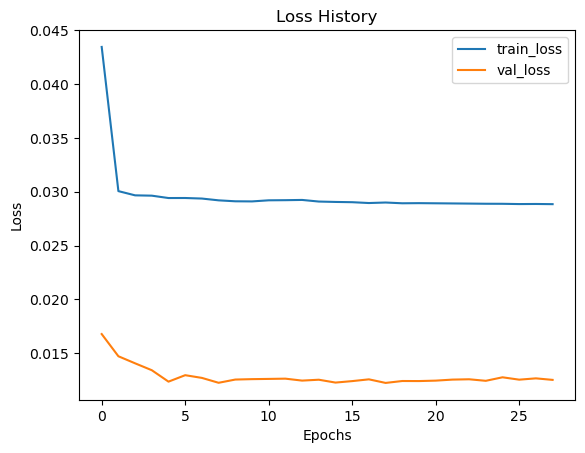

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

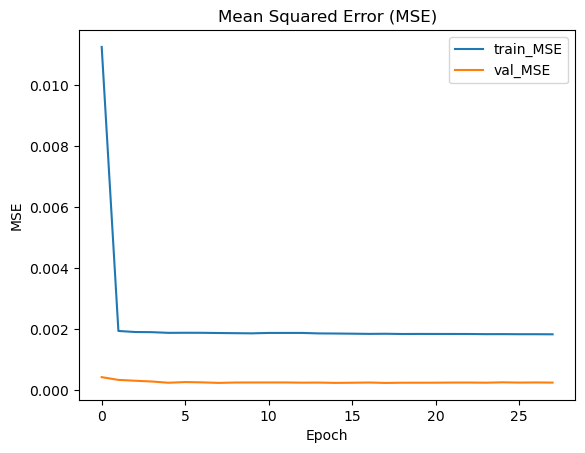

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

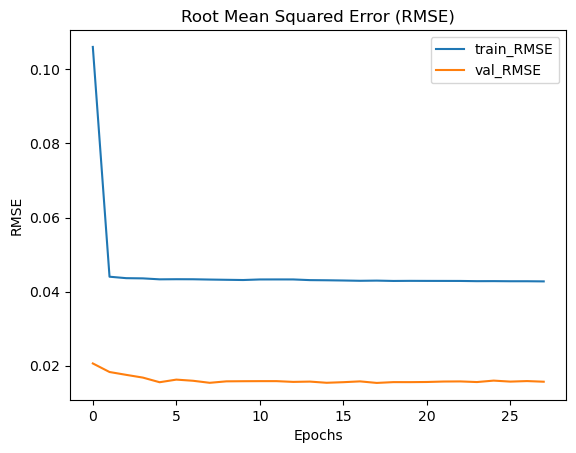

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

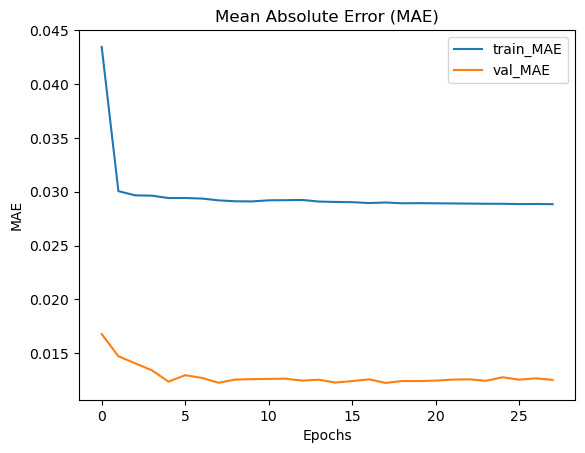

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

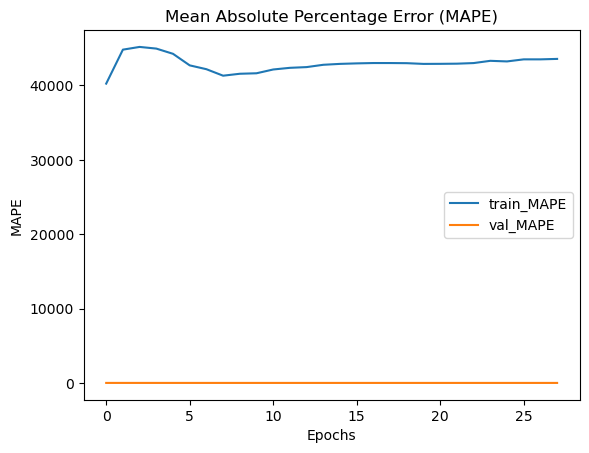

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:36:45.270187: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


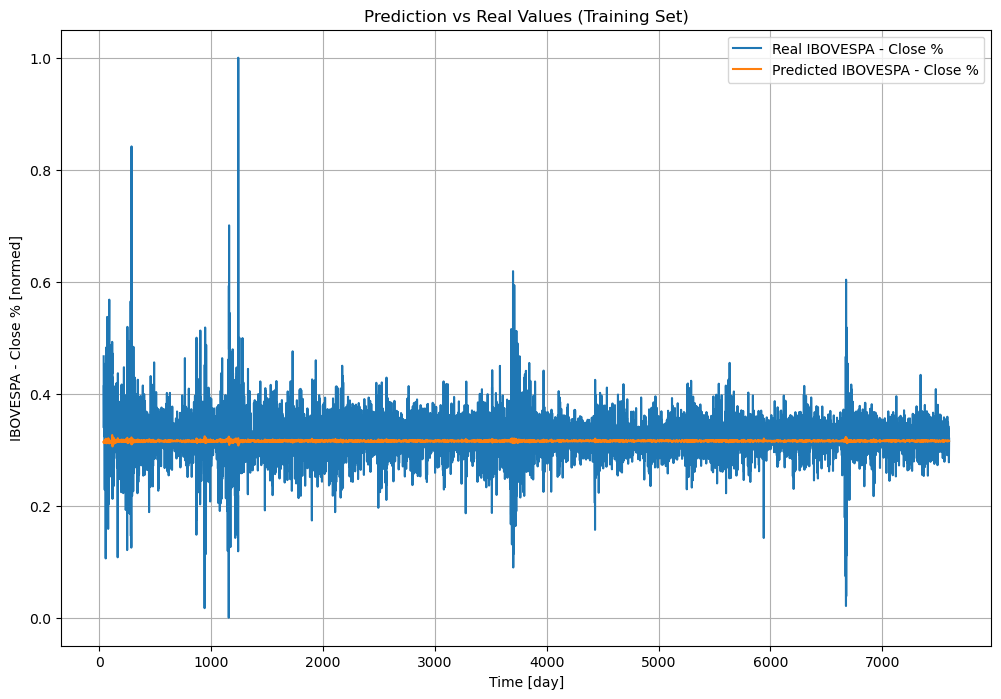

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


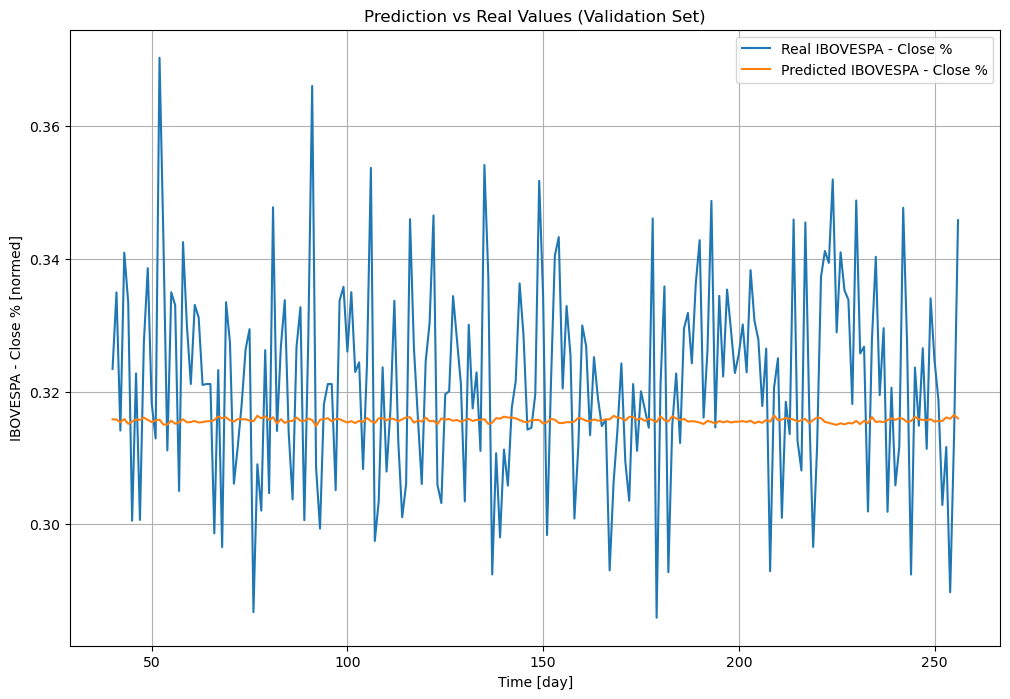

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


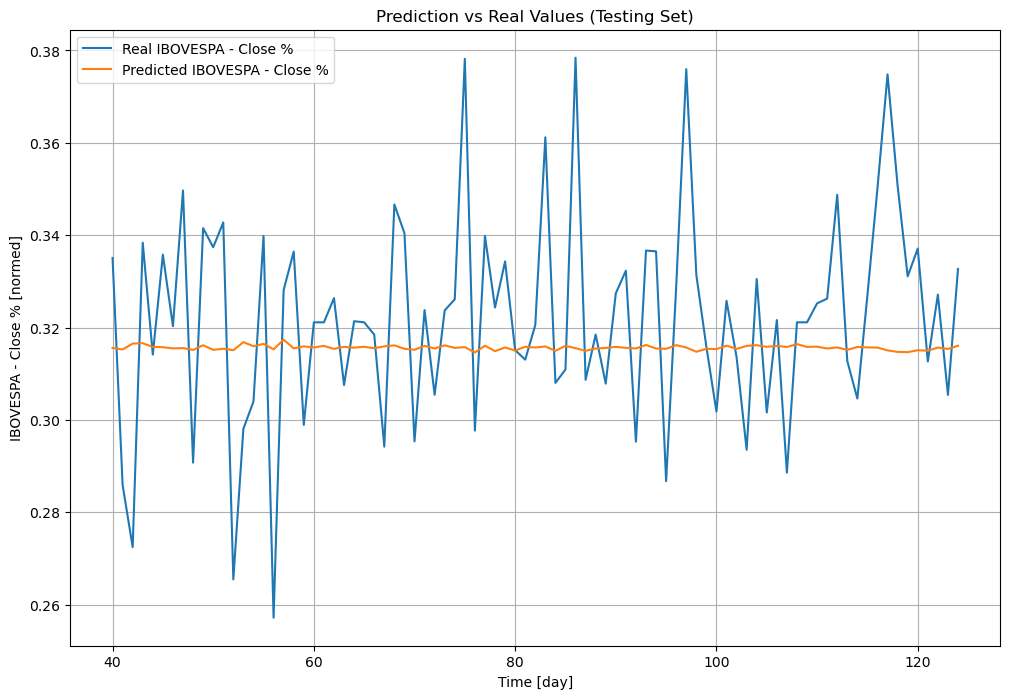

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

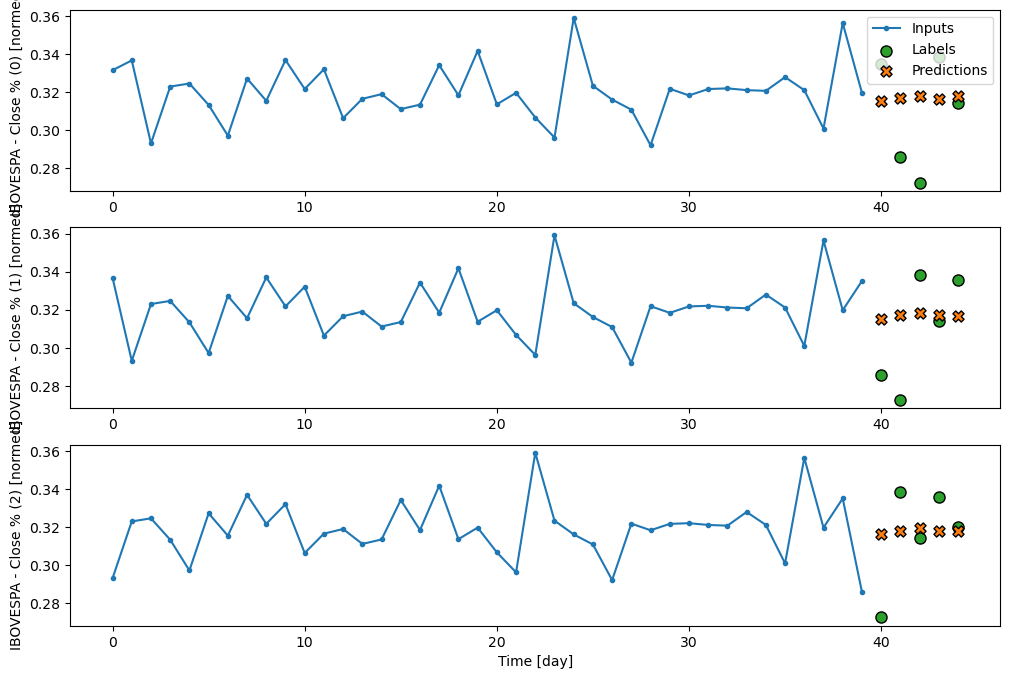

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:37s:564ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[[0.31559542, 0.31559542, 0.31559542, ..., 0.31559542,
         0.31559542, 0.31559542],
        [0.31687957, 0.31687957, 0.31687957, ..., 0.31687957,
         0.31687957, 0.31687957],
        [0.31787294, 0.31787294, 0.31787294, ..., 0.31787294,
         0.31787294, 0.31787294],
        [0.3164584 , 0.3164584 , 0.3164584 , ..., 0.3164584 ,
         0.3164584 , 0.3164584 ],
        [0.3180286 , 0.3180286 , 0.3180286 , ..., 0.3180286 ,
         0.31812388, 0.31812388]],

       [[0.31525254, 0.31525254, 0.31525254, ..., 0.31525254,
         0.31525254, 0.31525254],
        [0.3171232 , 0.3171232 , 0.3171232 , ..., 0.3171232 ,
         0.3171232 , 0.3171232 ],
        [0.31837854, 0.31837854, 0.31837854, ..., 0.31837854,
         0.31837854, 0.31837854],
        [0.31730336, 0.31730336, 0.31730336, ..., 0.31730336,
         0.31730336, 0.31730336],
        [0.31675866, 0.31675866, 0.31675866, ..., 0.31675866,
         0.31676033, 0.31676033]],

       [[0.31653666, 0.31653666, 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')